## Libraries

In [4]:
import pybullet as p
import pybullet_data
import time

import numpy as np
import matplotlib.pyplot as plt

## Multiple Instances same control

b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frame
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: base_footprint
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frame
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: imu_link
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frame
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: top_plate_link
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: 

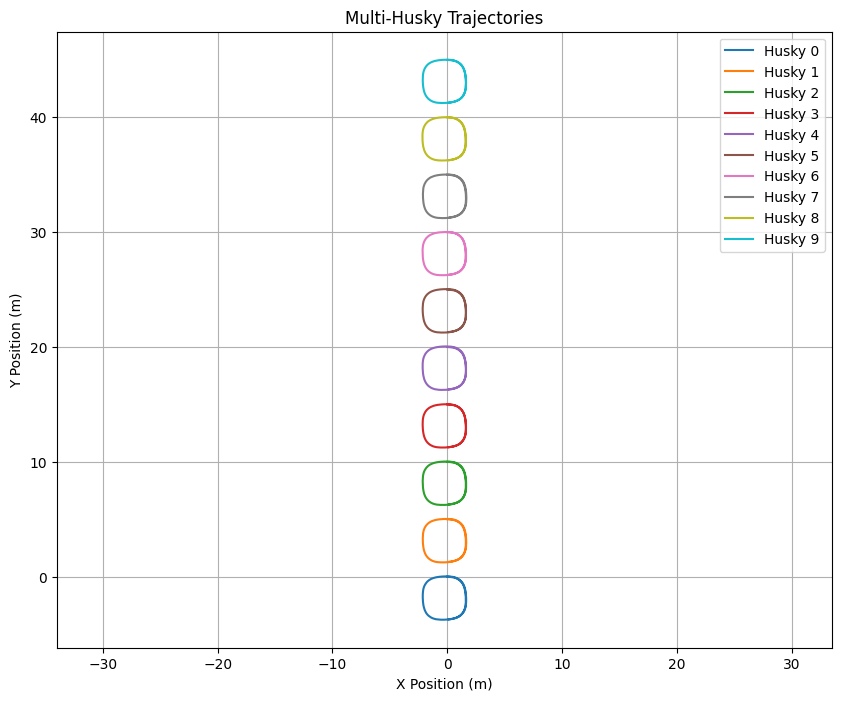

: 

In [ ]:
# Connect to PyBullet
p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath())

# Load ground plane
p.loadURDF("plane.urdf")
p.setGravity(0, 0, -9.8)

# Create multiple Husky instances
num_robots = 10
robot_ids = []
initial_positions = [(0, i * 5.0, 0.2) for i in range(num_robots)]  # Spaced along x-axis

for pos in initial_positions:
    husky_id = p.loadURDF("husky/husky.urdf", pos)
    robot_ids.append(husky_id)

# Wheel joints are always the same for Husky
wheel_joints = [2, 3, 4, 5]

# Track each robot's (x, y) position over time
positions_over_time = [[] for _ in range(num_robots)]

def set_all_wheel_velocities(left_vel, right_vel, force=100):
    for husky_id in robot_ids:
        for i, joint in enumerate(wheel_joints):
            vel = left_vel if i % 2 == 0 else right_vel
            p.setJointMotorControl2(husky_id, joint, p.VELOCITY_CONTROL, targetVelocity=vel, force=force)

def move_all_huskies(left_vel, right_vel, duration, hz=240):
    steps = int(duration * hz)
    set_all_wheel_velocities(left_vel, right_vel)
    for _ in range(steps):
        p.stepSimulation()
        for idx, husky_id in enumerate(robot_ids):
            pos, _ = p.getBasePositionAndOrientation(husky_id)
            positions_over_time[idx].append(pos[:2])
        time.sleep(1 / hz)

# Run the motion sequence
move_all_huskies(5, 2, 30)
# move_all_huskies(2, 5, 5)
# move_all_huskies(5, 2, 5)
# move_all_huskies(0, 0, 1)

p.disconnect()

# Plot each robot's trajectory
plt.figure(figsize=(10, 8))
for idx, path in enumerate(positions_over_time):
    x_vals, y_vals = zip(*path)
    plt.plot(x_vals, y_vals, label=f"Husky {idx}")

plt.title("Multi-Husky Trajectories")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()